In [1]:
import numpy as np
import torch
from torchvision import models
import torch.nn.functional as F
import torch.nn as nn

import sys
sys.path.append("./integrated_gradients")
from integrated_gradients.utils import calculate_outputs_and_gradients, generate_entrie_images
from integrated_gradients.integrated_gradients import random_baseline_integrated_gradients
from integrated_gradients.visualization import visualize

In [2]:
#hardware
device = 'cuda:0'

from circuit_pruner.utils import load_config

config = load_config('/mnt/data/chris/dropbox/Research-Hamblin/Projects/circuit_pruner_cvpr2022/configs/alexnet_sparse_config.py')
model = config.model.to(device)



#general
import os
from copy import deepcopy
from circuit_pruner.force import setup_net_for_circuit_prune, show_model_layer_names


show_model_layer_names(model)

/home/chris/miniconda3/envs/circuit_pruner/lib/python3.7/site-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla K40c with CUDA capability sm_35 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the Tesla K40c GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


All Layers:

features
features_0
features_1
features_2
features_3
features_4
features_5
features_6
features_7
features_8
features_9
features_10
features_11
features_12
avgpool
classifier
classifier_0
classifier_1
classifier_2
classifier_3
classifier_4
classifier_5
classifier_6

Convolutional and Linear layers:

('features_0', '  conv')
('features_3', '  conv')
('features_6', '  conv')
('features_8', '  conv')
('features_10', '  conv')
('classifier_1', '  linear')
('classifier_4', '  linear')
('classifier_6', '  linear')


['features',
 'features_0',
 'features_1',
 'features_2',
 'features_3',
 'features_4',
 'features_5',
 'features_6',
 'features_7',
 'features_8',
 'features_9',
 'features_10',
 'features_11',
 'features_12',
 'avgpool',
 'classifier',
 'classifier_0',
 'classifier_1',
 'classifier_2',
 'classifier_3',
 'classifier_4',
 'classifier_5',
 'classifier_6']

In [13]:
#feature target
layer = 'features_10'
unit = 241
#layer = 'features_0'
#unit = 0

feature_targets = {layer:[unit]}

In [5]:
import numpy as np
import torch
from torchvision import models
import cv2
import torch.nn.functional as F
from integrated_gradients.utils import calculate_outputs_and_gradients, generate_entrie_images
from integrated_gradients.integrated_gradients import random_baseline_integrated_gradients
from integrated_gradients.visualization import visualize

In [6]:
from PIL import Image, ImageOps

# read the image
img = Image.open('./integrated_gradients/examples/01.jpg')
img = np.array(img)

attributions = random_baseline_integrated_gradients(img, model, None,steps=50, 
                                                    num_random_trials=10, device=device)
img_integrated_gradient_overlay = visualize(attributions, img, clip_above_percentile=99, clip_below_percentile=0, \
                                                overlay=True, mask_mode=True)

the trial number is: 0
the trial number is: 1
the trial number is: 2
the trial number is: 3
the trial number is: 4
the trial number is: 5
the trial number is: 6
the trial number is: 7
the trial number is: 8
the trial number is: 9


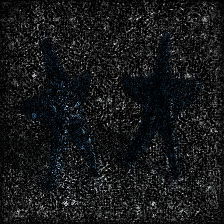

In [12]:
Image.fromarray(img_integrated_gradient_overlay..astype(np.uint8))

In [9]:
img_integrated_gradient_overlay

(224, 224, 3)

In [11]:
img_integrated_gradient_overlay.max()

249.0

In [18]:
img.max()

255